In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [47]:
df=pd.read_csv('hotel_booking.csv')

In [ ]:
# Bus atliekma dviejų viešbučių "Resort Hotel" ir "City Hotel" analizė. Abu viešbučiai yra Portugalijoje, 
# "Resort Hotel" yra kurortiniame Algravės regione, "City Hotel" yra Lisabonos mieste. Tarp jų yra 280 km atstumas
# ir abi vietos ribojasi su Šiaurės Atlantu.

In [48]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,59.94,0,1,Check-Out,02/01/2016,Sherri Ortiz,Ortiz.Sherri37@mail.com,315-741-7352,************2125
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,116.10,1,1,Check-Out,02/01/2016,John Patel,JPatel@yandex.com,779-515-8181,************9807
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,Transient,89.00,0,1,No-Show,01/01/2016,Ashley Stewart,Ashley_Stewart47@aol.com,328-942-1542,************6029
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,Transient,73.46,0,2,Check-Out,03/01/2016,Vanessa Taylor,Vanessa.T74@outlook.com,684-380-1411,************1935
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,Transient,119.00,0,0,Canceled,22/12/2015,Erik Jordan,Erik_Jordan@yandex.com,649-894-9639,************2421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,17,2016,December,53,30,2,5,2,...,Transient,90.34,0,1,Check-Out,06/01/2017,Billy Howell,Billy.Howell11@hotmail.com,597-460-5171,************8509
119386,City Hotel,0,177,2016,December,53,30,2,5,0,...,Transient,1.29,0,2,Check-Out,06/01/2017,Mark Torres,Mark.T@hotmail.com,735-191-4996,************3411
119387,City Hotel,0,107,2016,December,53,31,2,5,2,...,Transient,103.57,0,0,Check-Out,07/01/2017,Elizabeth Davenport,Elizabeth_Davenport@mail.com,516-265-9554,************5640
119388,City Hotel,0,310,2016,December,53,27,2,10,2,...,Transient-Party,68.57,0,2,Check-Out,08/01/2017,Daniel Patterson,Daniel.P@aol.com,531-431-4227,************5793


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [50]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [51]:
# Analizė
# 1. Kiek buvo atšaukta užsakymų
# 2. Iš kokių šalių atvyksta daugiausiai žmonių
# 3. Užsakymai pagal rinkos segmentus
# 4. Kokia yra vidutinė paros kaina 
# 5. Kaip kinta vidutinį paros kaina per metus
# 6. Kokiais mėnesiais atvyksta daugiausiai svečių
# 7. Kaip ilgai svečiai apsistoja viešbučiuose




In [52]:
# KIEK BUVO ATŠAUKTA UŽSAKYMŲ


df[df['is_canceled']== 1]['is_canceled'].count()
#print(df.isin({'is_canceled': [True]}))



44224

In [53]:
df1=df[(df['is_canceled']==1) & (df['hotel']=='City Hotel')]

len(df1)

33102

In [54]:
df2=df[(df['is_canceled']==1) & (df['hotel']=='Resort Hotel')]

len(df2)

11122

In [55]:
# Bendras procentas atšauktų užsakymų nuo visų užsakymų sumos
x = round((44224*100)/119390),2
x

(37, 2)

In [56]:
# Procentas atšauktų užsakymų City Hotel
y = round((33102*100)/44224),2
y

(75, 2)

In [57]:
# Procentas atšauktų užsakymų Resort Hotel
z = round((11122*100)/44224),2
z

(25, 2)

In [58]:
# Išvada: City hotel atnuliavimo procentas labai aukštas

In [59]:
# IŠ KOKIŲ ŠALIŲ ATVYKSTA SVEČIAI

df=df[df.is_canceled !=1]# palikau, kur adr vertes nelygios 1


In [60]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,59.94,0,1,Check-Out,02/01/2016,Sherri Ortiz,Ortiz.Sherri37@mail.com,315-741-7352,************2125
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,116.10,1,1,Check-Out,02/01/2016,John Patel,JPatel@yandex.com,779-515-8181,************9807
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,Transient,73.46,0,2,Check-Out,03/01/2016,Vanessa Taylor,Vanessa.T74@outlook.com,684-380-1411,************1935
6,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,Transient,90.17,0,2,Check-Out,03/01/2016,Eric White,EWhite@yandex.com,103-323-0529,************3343
32,Resort Hotel,0,110,2016,January,1,2,2,5,2,...,Transient,46.93,0,3,Check-Out,09/01/2016,Christopher Pugh,Christopher.Pugh@yandex.com,780-440-1080,************1278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,17,2016,December,53,30,2,5,2,...,Transient,90.34,0,1,Check-Out,06/01/2017,Billy Howell,Billy.Howell11@hotmail.com,597-460-5171,************8509
119386,City Hotel,0,177,2016,December,53,30,2,5,0,...,Transient,1.29,0,2,Check-Out,06/01/2017,Mark Torres,Mark.T@hotmail.com,735-191-4996,************3411
119387,City Hotel,0,107,2016,December,53,31,2,5,2,...,Transient,103.57,0,0,Check-Out,07/01/2017,Elizabeth Davenport,Elizabeth_Davenport@mail.com,516-265-9554,************5640
119388,City Hotel,0,310,2016,December,53,27,2,10,2,...,Transient-Party,68.57,0,2,Check-Out,08/01/2017,Daniel Patterson,Daniel.P@aol.com,531-431-4227,************5793


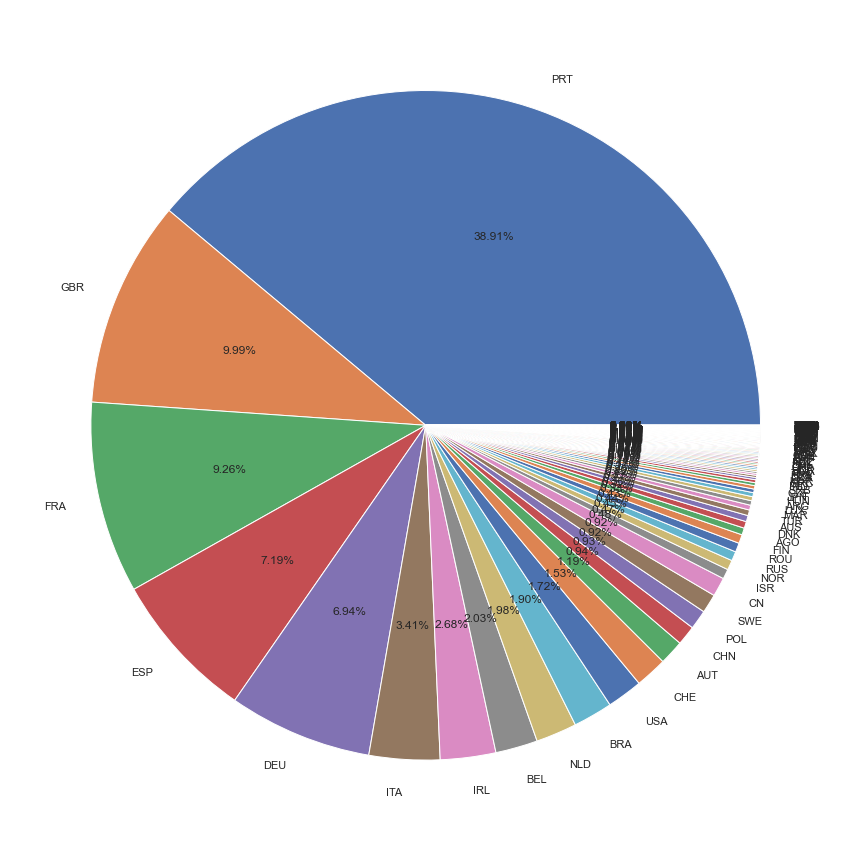

In [44]:
df['country'].value_counts()
rez=dict(df['country'].value_counts())

plt.pie(rez.values(), labels=rez.keys(),autopct='%.2f%%')
plt.show()


In [ ]:
# UŽSAKYMAI PAGAL RINKOS SEGMENTUS


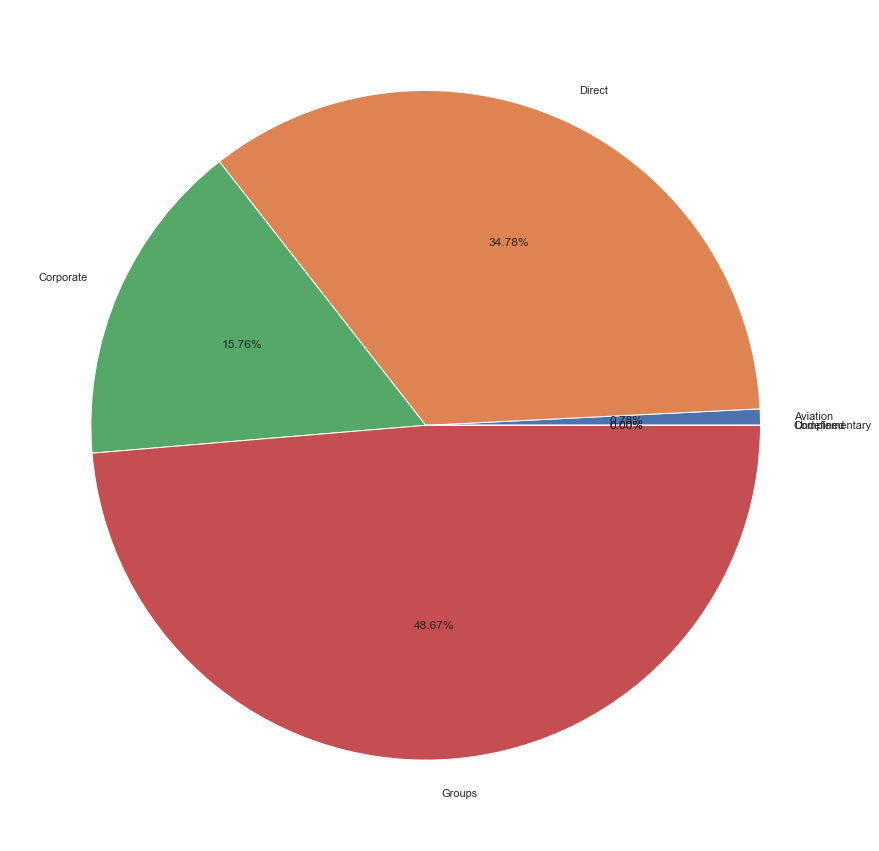

In [45]:
Aviation=(df['market_segment']=='Aviation').sum()
Direct=(df['market_segment']=='Direct').sum()
Corporate =(df['market_segment']=='Corporate').sum()
Online_TA=(df['market_segment']=='Online TA').sum()
Groups=(df['market_segment']=='Groups').sum()
Offline_TA_TO=(df['market_segment']=='Offline TA/TO').sum()
Complementary=(df['market_segment']=='Complementaty').sum()
Undefined=(df['market_segment']=='Undefined').sum()
plt.pie([Aviation, Direct, Corporate,Groups, Complementary,Undefined], labels=['Aviation', 'Direct','Corporate','Groups', 'Complementary','Undefined'],autopct='%.2f%%')
plt.show()


In [20]:

# KIEK VIDUTININIŠKAI SVEČIAI MOKA ABIEJUOSE VIEŠBUČIUOSE



In [21]:

# išimu nulinias vertes iš df
# randu kur nuliai
def funkcija (df):
    L= [0]
    rez = df[df['adr'].isin(L)]
    print(rez.adr) # svarbu atitraukimas
 
funkcija(df)  

83        0.0
94        0.0
189       0.0
194       0.0
303       0.0
         ... 
118736    0.0
118809    0.0
118858    0.0
119084    0.0
119169    0.0
Name: adr, Length: 1959, dtype: float64


In [22]:
df=df[df.adr !=0]# išimu reikšmes, kur adr vertes lygios 0

In [26]:
df['numberOFpeopleINnumber']=df['adults']+df['children']+df['babies']
df

<ipython-input-26-5f72aa56573b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numberOFpeopleINnumber']=df['adults']+df['children']+df['babies']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,numberOFpeopleINnumber
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,59.94,0,1,Check-Out,02/01/2016,Sherri Ortiz,Ortiz.Sherri37@mail.com,315-741-7352,************2125,2.0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,116.10,1,1,Check-Out,02/01/2016,John Patel,JPatel@yandex.com,779-515-8181,************9807,4.0
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,89.00,0,1,No-Show,01/01/2016,Ashley Stewart,Ashley_Stewart47@aol.com,328-942-1542,************6029,2.0
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,73.46,0,2,Check-Out,03/01/2016,Vanessa Taylor,Vanessa.T74@outlook.com,684-380-1411,************1935,2.0
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,119.00,0,0,Canceled,22/12/2015,Erik Jordan,Erik_Jordan@yandex.com,649-894-9639,************2421,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,17,2016,December,53,30,2,5,2,...,90.34,0,1,Check-Out,06/01/2017,Billy Howell,Billy.Howell11@hotmail.com,597-460-5171,************8509,2.0
119386,City Hotel,0,177,2016,December,53,30,2,5,0,...,1.29,0,2,Check-Out,06/01/2017,Mark Torres,Mark.T@hotmail.com,735-191-4996,************3411,0.0
119387,City Hotel,0,107,2016,December,53,31,2,5,2,...,103.57,0,0,Check-Out,07/01/2017,Elizabeth Davenport,Elizabeth_Davenport@mail.com,516-265-9554,************5640,2.0
119388,City Hotel,0,310,2016,December,53,27,2,10,2,...,68.57,0,2,Check-Out,08/01/2017,Daniel Patterson,Daniel.P@aol.com,531-431-4227,************5793,2.0


In [29]:
df=df[df.numberOFpeopleINnumber !=0]

df['pricePERperson']=round(df['adr']/df['numberOFpeopleINnumber'])
df

<ipython-input-29-6ea8f5c206ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pricePERperson']=round(df['adr']/df['numberOFpeopleINnumber'])


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,numberOFpeopleINnumber,pricePERperson
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,1,Check-Out,02/01/2016,Sherri Ortiz,Ortiz.Sherri37@mail.com,315-741-7352,************2125,2.0,30.0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,1,1,Check-Out,02/01/2016,John Patel,JPatel@yandex.com,779-515-8181,************9807,4.0,29.0
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,1,No-Show,01/01/2016,Ashley Stewart,Ashley_Stewart47@aol.com,328-942-1542,************6029,2.0,44.0
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,2,Check-Out,03/01/2016,Vanessa Taylor,Vanessa.T74@outlook.com,684-380-1411,************1935,2.0,37.0
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,0,Canceled,22/12/2015,Erik Jordan,Erik_Jordan@yandex.com,649-894-9639,************2421,4.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,173,2016,December,53,26,3,8,2,...,0,1,Check-Out,06/01/2017,Gary Kelley,GaryKelley@hotmail.com,137-344-4957,************5644,3.0,39.0
119385,City Hotel,0,17,2016,December,53,30,2,5,2,...,0,1,Check-Out,06/01/2017,Billy Howell,Billy.Howell11@hotmail.com,597-460-5171,************8509,2.0,45.0
119387,City Hotel,0,107,2016,December,53,31,2,5,2,...,0,0,Check-Out,07/01/2017,Elizabeth Davenport,Elizabeth_Davenport@mail.com,516-265-9554,************5640,2.0,52.0
119388,City Hotel,0,310,2016,December,53,27,2,10,2,...,0,2,Check-Out,08/01/2017,Daniel Patterson,Daniel.P@aol.com,531-431-4227,************5793,2.0,34.0


In [30]:
df['pricePERperson'].max()

2700.0

In [32]:
df[df['hotel']=='City Hotel']['pricePERperson'].mean() # vidutinė kaina 1 žmogui parai

59.21370761192501

In [33]:
df[df['hotel']=='Resort Hotel']['pricePERperson'].mean() 

49.127378650656354

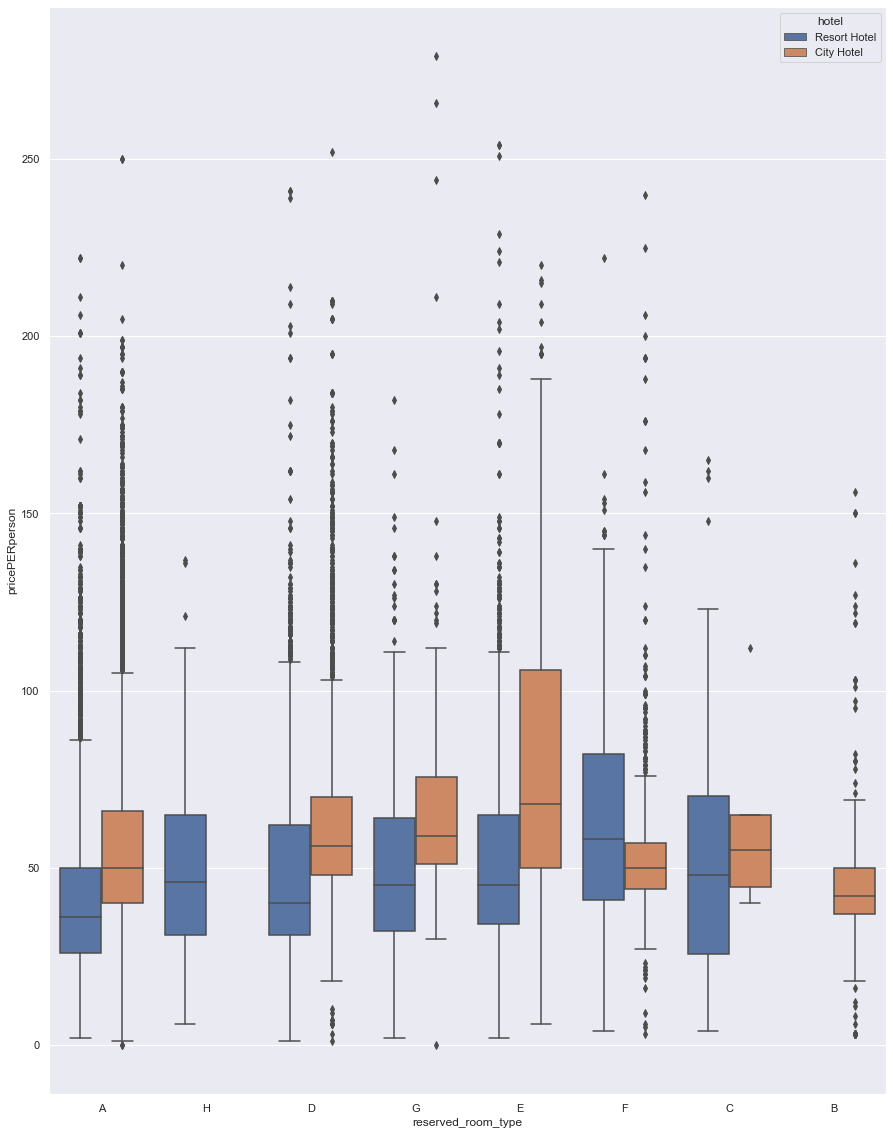

In [34]:
df=df[(df['arrival_date_year']==2016) & (df['pricePERperson']<2700)] # čia pašalinu atsitiktinį kainos padidėjimą

        
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(x='reserved_room_type', y ='pricePERperson', hue='hotel', data=df)

In [35]:
# Išvada: kainos abiejuose viešbučiuose pasiskirsto skirtingai pagal kambario tipą, City hotel brangiausi E ir G tipo numeriai, Resort Hotel F ir C 

In [36]:

# KAIP VARIJUOJA KAINA METŲ BĖGYJE


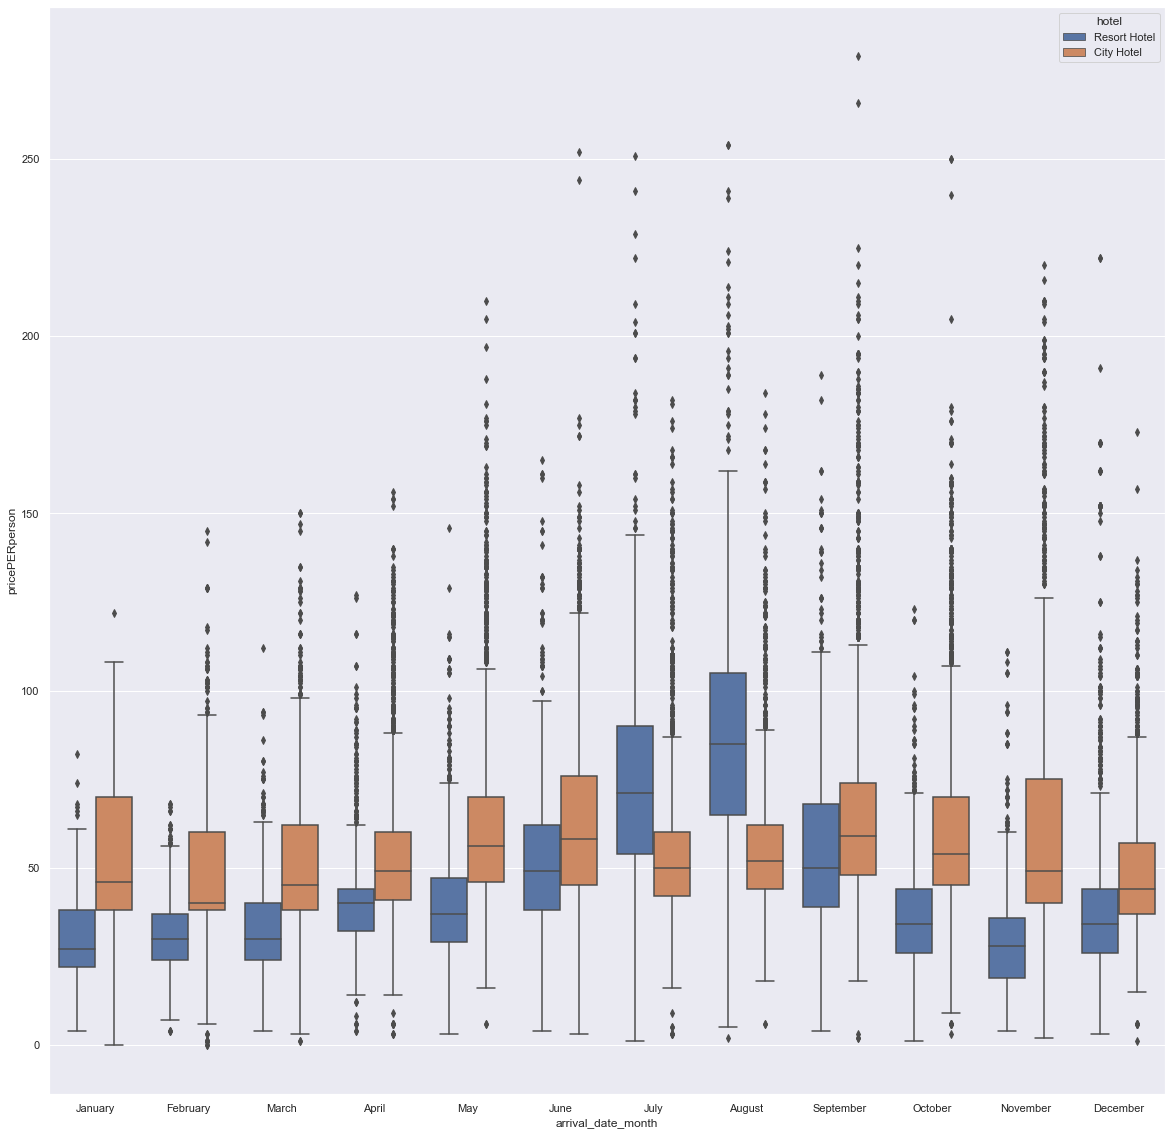

In [37]:
df=df[(df['arrival_date_year']==2016) & (df['pricePERperson']<500)] # cia pašalinu atsitiktinį kainos padidėjimą

        
sns.set(rc={'figure.figsize':(20,20 )})
#sns.lineplot(data=df, x = 'arrival_date_month', y ='kaina_vienam_zmogui', hue="hotel")

sns.boxplot(x='arrival_date_month', y ='pricePERperson', hue='hotel', data=df)

In [ ]:
# Išvada: Resort hotel yra kurortinėje zonoje, todėl kainos kyla vasaros sezono metu, o City hotel ,esančio mieste, kaina ne taip stipriai varijuoja, mažiau pasireiškia sezoniškumas

In [ ]:
# KOKIE MĖNESIAI LABAUSIAI POPULIARŪS

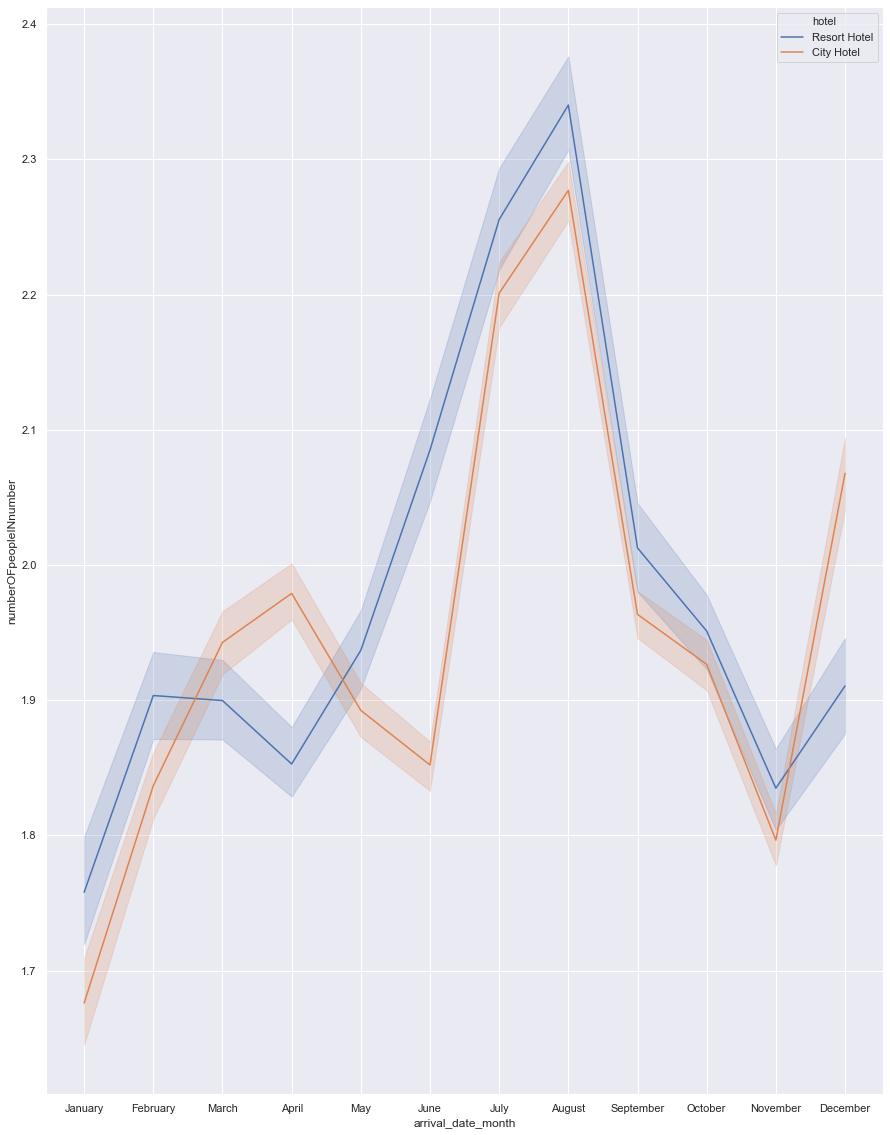

In [38]:
df=df[(df['arrival_date_year']==2016) & (df['numberOFpeopleINnumber']<6)] # cia pašalinu atsitiktinį  padidėjimą
sns.set(rc={'figure.figsize':(15,20)})
sns.lineplot(x='arrival_date_month', y ='numberOFpeopleINnumber', hue='hotel', data=df, sort=False)
#sns.boxplot(x='arrival_date_month', y ='zmoniu_skaicius_numeryje', hue='hotel', data=df)


In [ ]:
# Išvada: viešbučiams svarbu planuoti užimtumą, šiame grafike pavaizduota kokių kambarių dviviečių ar triviečių kokiais mėnesiais užsakoma daugiausiai. Abiejų viešbučių
# kreivės panašios t.y. vasaros mėnesiais daugiau atvyksta šeimos su vaikais, todėl populiariausi triviečiai kambariai. City hotel trivičiai reikalingi ir žiemą gruodžio mėnesį

In [ ]:
# SVEČIŲ PASISKIRSTZMAS MĖNESIAIS

In [39]:
df[df['hotel']=='Resort Hotel']['arrival_date_month'].value_counts() # suskaičiuoju atvykusiųjų skaičių į Resort Hotel kiekvienais metais

October      1943
April        1827
May          1758
March        1735
August       1670
September    1511
February     1491
July         1421
June         1341
December     1330
November     1302
January       855
Name: arrival_date_month, dtype: int64

In [40]:
df[df['hotel']=='City Hotel']['arrival_date_month'].value_counts() # suskaičiuoju atvykusiųjų skaičių į City Hotel kiekvienais metais

October      4162
June         3886
September    3829
May          3607
April        3518
August       3346
July         3085
November     3060
March        3002
December     2433
February     2328
January      1327
Name: arrival_date_month, dtype: int64

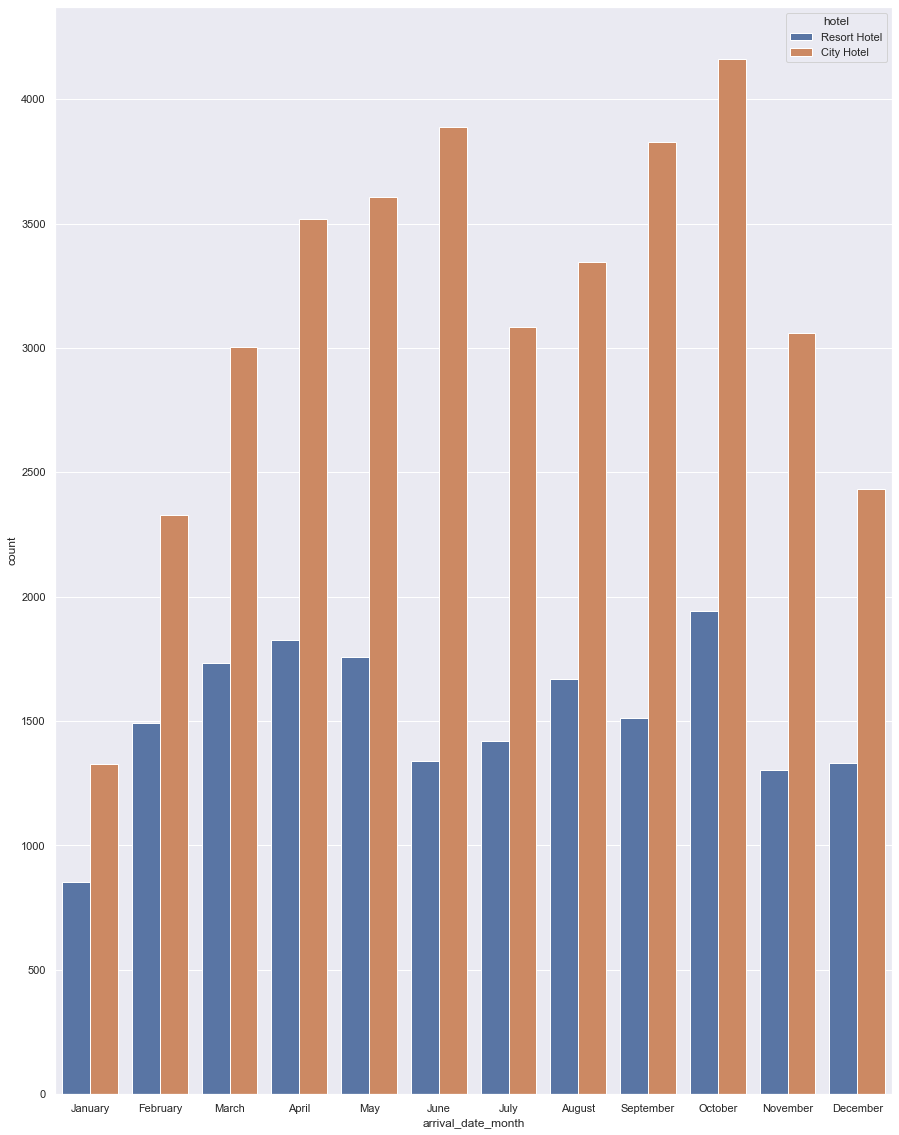

In [41]:
sns.countplot(x='arrival_date_month',hue='hotel',data=df) # lyginu atvykusiųjų skaičių kiekviename viešbutyje


In [ ]:
# Išvada - City hotel nuo kovo iki lapkričio svečių kiekis stabilus maždaug 2000 svečių per mėnesį, Resort Hotel apsistoja 1300 svečių  spalį, kovą, balandį ir gegužę

In [42]:

# KOKIAM LAIKOTARPIUI SVEČIAI APSISTOJA VIEŠBUČIUOSE


df[df['hotel']=='Resort Hotel']['stays_in_week_nights'].value_counts() # suskaičiuoju kiek parų apsistoja svečiai



1     4494
2     3511
5     3258
3     2783
4     1440
0     1132
6      446
10     408
7      357
8      214
9       57
15      29
20      17
11      10
12       8
13       7
14       3
30       2
21       2
25       2
19       2
24       1
50       1
Name: stays_in_week_nights, dtype: int64

In [43]:
df[df['hotel']=='City Hotel']['stays_in_week_nights'].value_counts() # suskaičiuoju kiek parų apsistoja svečiai City hotel

2     12564
1      9745
3      7821
4      2911
0      2382
5      1623
6       188
7        94
10       76
8        72
9        37
11       16
14        8
15        8
12        7
21        6
13        5
18        5
20        4
22        3
17        3
16        2
19        2
25        1
Name: stays_in_week_nights, dtype: int64

In [ ]:
# BENDRA IŠVADA>viešbučiai formuluodami kainų politiką, turi atsižvelgti į labai daug veiksnių. City hotel esantis mieste, sostineje Lisabonoje
# išvengia žmonių strauto sezoniškumo, bet turi koncentruoti savo dėmesį į labai aukštą užsakymų atšaukimo procentą. Resort hotel labiau priklauso nuo sezoniškumo,
# todėl turėtų imtis papildomų priemonių kaip pritraukti daugiau svečių ne sezono metu.